**COMPARISON OF SIGNAL PEPTIDES (SP) LENGTHS**

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import logomaker as lm

## Data Import and Labeling

We start by importing the two main datasets:

- **Training set** (`training_file_all_seq.tsv`)  
- **Benchmark set** (`benchmark_arricchito.tsv`)  

After loading, we add two new columns:  

- **`positive/negative`**  
  - `"-"` if no signal peptide is present (`SP cleavage = False`)  
  - `"+"` otherwise  
- **`subset_number`**  
  - `"trainingset"` for the training dataset  
  - `"benchmark"` for the benchmark dataset  

**Goal:**  
Standardize the two datasets so that each sequence carries explicit labels:  
1. Presence or absence of a signal peptide.  
2. Origin of the sequence (training vs benchmark).  

This ensures consistency for all downstream analyses and visualizations.  


In [153]:
df =pd.read_csv('training_file_all_seq.tsv', sep='\t')
df['positive/negative'] =np.where(df['SP cleavage']=='False', '-','+')
df['subset_number'] = 'trainingset'

In [154]:
df2 = pd.read_csv('benchmark_arricchito.tsv', sep='\t')
df2['subset_number'] = 'benchmark'
df2['positive/negative'] =np.where(df2['SP cleavage']=='False', '-','+')

## Extraction of Positive Sequences for SP Analysis

From both datasets, we isolate only the **positive sequences** (those with a signal peptide).  
For each subset (training and benchmark) we keep only the columns needed for the next steps:

- **`Sequence`** → the full protein sequence.  
- **`subset_number`** → dataset label (training vs benchmark).  
- **`SP cleavage`** → the cleavage position where the signal peptide ends.  

**Goal:**  
Prepare clean subsets of sequences that contain all the information required to extract the actual signal peptides.  
These DataFrames will later be used to cut each sequence at the cleavage site and obtain the SP subsequences.  


In [155]:
filter_positive_trainingset = df['positive/negative']== '+'
df_histograms_training_pos = df[filter_positive_trainingset]

In [156]:
filter_positive_benchmark = df2['positive/negative']== '+'
df_histograms_benchmark_pos = df2[filter_positive_benchmark]

In [157]:
benchmark = df_histograms_benchmark_pos[['Sequence','subset_number','SP cleavage']]
trainingset = df_histograms_training_pos[['Sequence','subset_number','SP cleavage']]

In [158]:
benchmark

,Sequence,subset_number,SP cleavage
23,MKTFVICLILVVAVSAAPDHHDGHLGGHQTGHQGGQQGGHLGGQQG...,benchmark,18
30,MLRFAVTLFAVITSSTCKKYSCLEGETHKLKPSPEPNMQECTLYSE...,benchmark,17
40,MRSLVVCLLLAACALECTARLQNVTVKGVAVCNKKRLANVEVQLYE...,benchmark,19
62,MNSPAIVIIIFSTLTFSEAWVNDWDGALNFQCQLKDSIKTISSIHS...,benchmark,19
90,MWATHGLAVALALSVLPASRALRQGDCEVCISYLGRFYQDLKDRDV...,benchmark,21
...,...,...,...
1959,MVRMVPVLLSLLLLLGPAVPQENQDGRYSLTYIYTGLSKHVEDVPA...,benchmark,20
1964,MRRCGRHSGPPSLLLLLLLLPPLLLSVPGAYAARLSVLYSSSDPLT...,benchmark,32
1973,MASLTAALATPAAAALLLLVLLAAPASAANFTCAVASGTTCKSAIL...,benchmark,28
1987,MKAVIVFCLMALSIVDAAWKPLPENLKEDLIVYQVYPRSFKDSNGD...,benchmark,17


## Signal Peptide Extraction

For both the training and benchmark datasets, we extract the **signal peptide subsequences**.  
This is done by cutting each protein sequence at the position indicated in the column `SP cleavage`.  
The result is stored in a new column: **`SP_sequence`**.  

**Goal:**  
- Obtain the exact amino acid sequences corresponding to the signal peptides.  
- Keep these subsequences explicitly available for downstream analyses (e.g., amino acid composition, cleavage site logos).  

In [159]:
benchmark["SP_sequence"] = benchmark.apply(
    lambda row: row["Sequence"][: int(row["SP cleavage"])], axis=1
)
trainingset["SP_sequence"] = trainingset.apply(
    lambda row: row["Sequence"][: int(row["SP cleavage"])], axis=1
)


C:\Users\valer\AppData\Local\Temp\ipykernel_19548\590173960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark["SP_sequence"] = benchmark.apply(
C:\Users\valer\AppData\Local\Temp\ipykernel_19548\590173960.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainingset["SP_sequence"] = trainingset.apply(


In [160]:
benchmark

,Sequence,subset_number,SP cleavage,SP_sequence
23,MKTFVICLILVVAVSAAPDHHDGHLGGHQTGHQGGQQGGHLGGQQG...,benchmark,18,MKTFVICLILVVAVSAAP
30,MLRFAVTLFAVITSSTCKKYSCLEGETHKLKPSPEPNMQECTLYSE...,benchmark,17,MLRFAVTLFAVITSSTC
40,MRSLVVCLLLAACALECTARLQNVTVKGVAVCNKKRLANVEVQLYE...,benchmark,19,MRSLVVCLLLAACALECTA
62,MNSPAIVIIIFSTLTFSEAWVNDWDGALNFQCQLKDSIKTISSIHS...,benchmark,19,MNSPAIVIIIFSTLTFSEA
90,MWATHGLAVALALSVLPASRALRQGDCEVCISYLGRFYQDLKDRDV...,benchmark,21,MWATHGLAVALALSVLPASRA
...,...,...,...,...
1959,MVRMVPVLLSLLLLLGPAVPQENQDGRYSLTYIYTGLSKHVEDVPA...,benchmark,20,MVRMVPVLLSLLLLLGPAVP
1964,MRRCGRHSGPPSLLLLLLLLPPLLLSVPGAYAARLSVLYSSSDPLT...,benchmark,32,MRRCGRHSGPPSLLLLLLLLPPLLLSVPGAYA
1973,MASLTAALATPAAAALLLLVLLAAPASAANFTCAVASGTTCKSAIL...,benchmark,28,MASLTAALATPAAAALLLLVLLAAPASA
1987,MKAVIVFCLMALSIVDAAWKPLPENLKEDLIVYQVYPRSFKDSNGD...,benchmark,17,MKAVIVFCLMALSIVDA


## Comparison with SwissProt Amino Acid Frequencies

To provide a background reference, we include the amino acid composition from **SwissProt**, a curated protein database.  
The frequencies (in %) for the 20 standard amino acids are extracted from https://web.expasy.org/docs/relnotes/relstat.html and stored in a dictionary.  
We then convert this into a DataFrame (`swiss_df`) with the same format as our SP datasets.

- **Columns**:  
  - `Residue`: amino acid symbol  
  - `Frequency (%)`: relative abundance in SwissProt  
  - `Database`: source identifier ("SwissProt")  

**Goal:**  
Create a standard background distribution of amino acid usage to directly compare against the amino acid composition of the signal peptides in our datasets (training and benchmark).  
This comparison allows us to identify residues that are enriched or depleted in signal peptides relative to the global protein population.  


In [161]:
swiss_frequencies = {
    "A": 8.25, "R": 5.53, "N": 4.06, "D": 5.45, "C": 1.37,
    "Q": 3.93, "E": 6.75, "G": 7.07, "H": 2.27, "I": 5.96,
    "L": 9.66, "K": 5.84, "M": 2.42, "F": 3.86, "P": 4.70,
    "S": 6.56, "T": 5.34, "W": 1.08, "Y": 2.92, "V": 6.87,
    'X':0, 'B':0 ,'Z':0, 'J':0
}

swiss_df = pd.DataFrame(swiss_frequencies.items(), columns=["Residue", "Frequency (%)"])
swiss_df["Database"] = "SwissProt"


In [162]:
swiss_df

,Residue,Frequency (%),Database
0,A,8.25,SwissProt
1,R,5.53,SwissProt
2,N,4.06,SwissProt
3,D,5.45,SwissProt
4,C,1.37,SwissProt
5,Q,3.93,SwissProt
6,E,6.75,SwissProt
7,G,7.07,SwissProt
8,H,2.27,SwissProt
9,I,5.96,SwissProt


## Amino Acid Frequencies of Signal Peptides

We compute the amino acid composition of the extracted signal peptides in both the **training** and **benchmark** datasets.  

**Steps:**  
1. Concatenate all SP sequences into a single long string.  
2. Count the occurrences of each amino acid.  
3. Normalize counts to percentages relative to the total amino acids.  
4. Round results to two decimal places.  

**Goal:**  
- Obtain the amino acid frequency distribution of signal peptides in each dataset.  
- Prepare these results in the same format as SwissProt frequencies, so that direct comparisons can be made.  

This analysis allows us to detect amino acids that are **enriched or depleted in signal peptides** compared to the global protein background (SwissProt).  

In [163]:
aminoacids_t = trainingset['SP_sequence'].tolist()
aminoacids_t = ''.join(aminoacids_t)
tot_aa_t = len(aminoacids_t)

training_frequencies = {'M': 0, 'K': 0, 'A': 0, 'S': 0, 'V': 0, 'T': 0, 'L': 0, 'G': 0, 'I': 0, 'P': 0, 'N': 0, 'R': 0, 'F': 0, 'E': 0, 'D': 0, 'W': 0, 'Q': 0, 'C': 0, 'H': 0, 'Y': 0, 'X':0, 'B':0 ,'Z':0, 'J':0}


for i in aminoacids_t:
    training_frequencies[i] = training_frequencies[i] + 1

for i in training_frequencies:
    training_frequencies[i] = (training_frequencies[i]/tot_aa_t)*100
    training_frequencies[i] = round(training_frequencies[i], 2)


In [164]:
aminoacids_b = benchmark['SP_sequence'].tolist()
aminoacids_b = ''.join(aminoacids_b)
tot_aa_b = len(aminoacids_b)

benchmark_frequencies = {'M': 0, 'K': 0, 'A': 0, 'S': 0, 'V': 0, 'T': 0, 'L': 0, 'G': 0, 'I': 0, 'P': 0, 'N': 0, 'R': 0, 'F': 0, 'E': 0, 'D': 0, 'W': 0, 'Q': 0, 'C': 0, 'H': 0, 'Y': 0, 'X':0, 'B':0 ,'Z':0, 'J':0}



for i in aminoacids_b:
    benchmark_frequencies[i] = benchmark_frequencies[i] + 1

for i in benchmark_frequencies:
    benchmark_frequencies[i] = (benchmark_frequencies[i]/tot_aa_b)*100
    benchmark_frequencies[i] = round(benchmark_frequencies[i], 2)


## Converting Frequencies into DataFrames

The amino acid frequencies calculated for the **training set** and **benchmark set** are converted into DataFrames.  
Each DataFrame contains:  

- **`Residue`** → amino acid symbol  
- **`Frequency (%)`** → relative abundance in the dataset  
- **`Database`** → dataset label ("trainingset" or "benchmark") 

In [165]:
benchmark_plot = pd.DataFrame(benchmark_frequencies.items(), columns=["Residue", "Frequency (%)"])
benchmark_plot['Database'] = 'benchmark'
training_plot = pd.DataFrame(training_frequencies.items(), columns=["Residue", "Frequency (%)"])
training_plot['Database'] = 'trainingset'

In [166]:
training_plot

,Residue,Frequency (%),Database
0,M,6.29,trainingset
1,K,2.27,trainingset
2,A,14.07,trainingset
3,S,7.60,trainingset
4,V,8.35,trainingset
5,T,4.45,trainingset
6,L,22.01,trainingset
7,G,5.86,trainingset
8,I,4.62,trainingset
9,P,4.12,trainingset


In [167]:
benchmark_plot

,Residue,Frequency (%),Database
0,M,6.53,benchmark
1,K,1.99,benchmark
2,A,15.21,benchmark
3,S,7.19,benchmark
4,V,8.08,benchmark
5,T,4.51,benchmark
6,L,21.74,benchmark
7,G,6.55,benchmark
8,I,4.11,benchmark
9,P,3.99,benchmark


## Amino Acid Composition of Signal Peptides

We visualize the amino acid frequency distributions of signal peptides for both datasets:

- **Benchmark set**: barplot of amino acid frequencies.  
- **Training set**: barplot of amino acid frequencies.  

Each plot shows the relative abundance (%) of residues in the signal peptides of the respective dataset.  
The `hue` parameter is used to label the dataset source, while `kind="bar"` generates barplots.

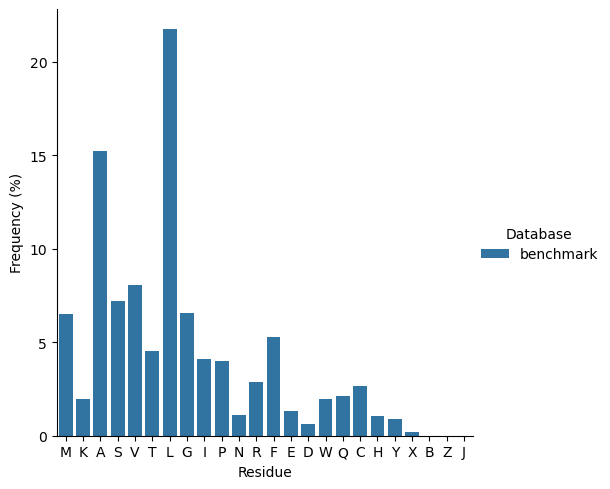

In [168]:
sns.catplot(
    data=benchmark_plot,
    x="Residue",
    y="Frequency (%)",
    hue="Database",  
    kind="bar"      
)
plt.savefig("residue_frequency_benchmark.png", dpi=300, bbox_inches="tight")

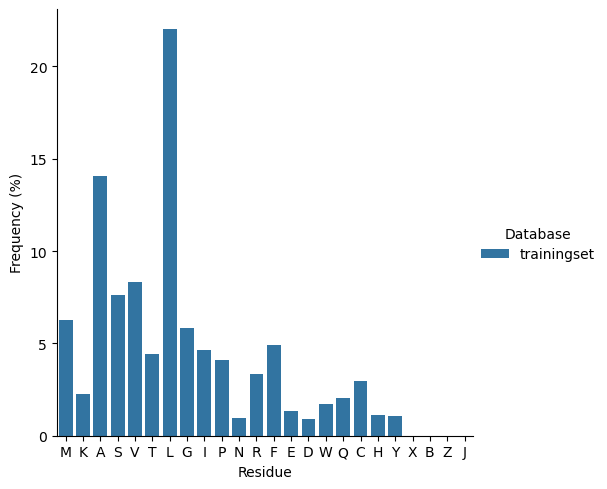

In [169]:
sns.catplot(
    data=training_plot,
    x="Residue",
    y="Frequency (%)",
    hue="Database",  
    kind="bar"      
)
plt.savefig("residue_frequency_training.png", dpi=300, bbox_inches="tight")

## Comparative Amino Acid Composition (Training vs Benchmark vs SwissProt)

We concatenate the amino acid frequency DataFrames from all three sources:
- **Training set**  
- **Benchmark set**  
- **SwissProt background**  

Using `sns.catplot(kind="bar")`, we generate a **combined barplot** showing the frequency (%) of each amino acid across the three datasets.  
The `hue="Database"` parameter ensures that bars are colored by dataset, allowing direct comparison residue by residue.  

**Goal:**  
- Identify amino acids that are enriched or depleted in signal peptides relative to the SwissProt background.  
- Highlight similarities and differences between the training and benchmark datasets.  
- Provide a unified visualization that summarizes the compositional features of SP sequences.  

The final plot is saved as a high-resolution image (`residue_frequency_total.png`) for reporting purposes.  


In [170]:
dataframe=pd.concat([benchmark_plot,training_plot,swiss_df], ignore_index=True)

In [171]:
#total dataframe comprising of SwissProt, training set and benchmark set
dataframe

,Residue,Frequency (%),Database
0,M,6.53,benchmark
1,K,1.99,benchmark
2,A,15.21,benchmark
3,S,7.19,benchmark
4,V,8.08,benchmark
...,...,...,...
67,V,6.87,SwissProt
68,X,0.00,SwissProt
69,B,0.00,SwissProt
70,Z,0.00,SwissProt


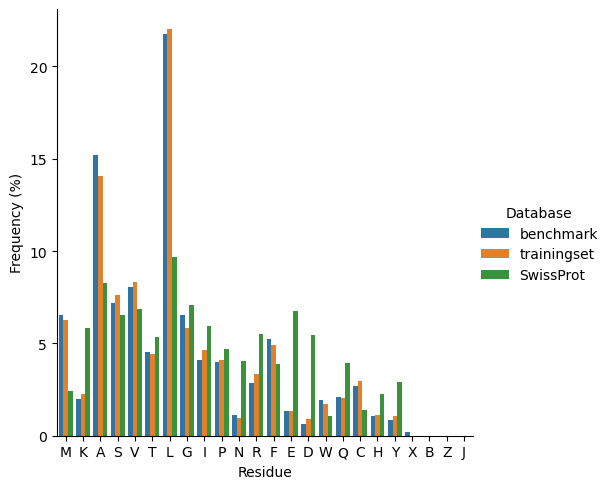

In [172]:
sns.catplot(
    data=dataframe,
    x="Residue",
    y="Frequency (%)",
    hue="Database",  
    kind="bar"      
)

plt.savefig("residue_frequency_total.png", dpi=300, bbox_inches="tight")

#methionine is over represented because we are just taking the N terminal
#also charged residues are under represented

## Taxonomic Distribution (Training Set)

We analyze the **taxonomic composition** of the training dataset at the **Kingdom level**.

**Steps:**  
1. Count occurrences of each kingdom.  
2. Group less represented kingdoms below a frequency threshold (e.g., < 1000 entries) into a single category called *"Other"*.  
3. Visualize the results in a pie chart, showing the percentage distribution of kingdoms in the dataset.  

**Goal:**  
- Provide an overview of the taxonomic diversity represented in the training set.  
- Highlight the dominant kingdoms while avoiding clutter from very small categories.  

The final chart (`Kingdom_occurrence_in_training_set_pie.png`) summarizes the contribution of each kingdom in the dataset.  

In [173]:
from collections import defaultdict

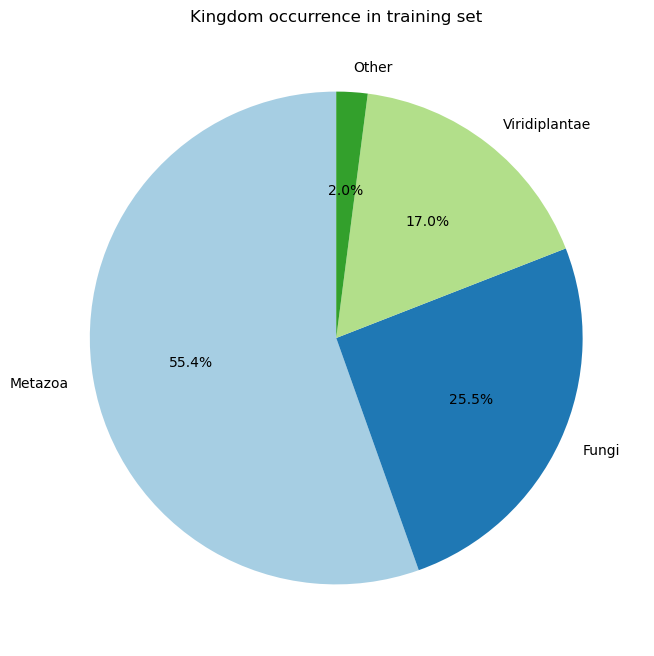

In [174]:
#
df_training =pd.read_csv('training_file_all_seq.tsv', sep='\t')

df_training_kingdom=df_training["Kingdom"].tolist()
total_entries_training=len(df_training_kingdom)
kingdoms_training=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_training_kingdom:
        kingdoms_training[element]+=1

training_pie = pd.DataFrame(kingdoms_training.items(), columns=["Kingdom", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
training_pie = training_pie.sort_values(by='Occurrence', ascending=False)
threshold = 1000 # You can adjust this value

small_values = training_pie[training_pie['Occurrence'] < threshold]
main_values = training_pie[training_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Kingdom': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Kingdom'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Kingdom occurrence in training set')
plt.savefig("Kingdom_occurrence_in_training_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()

## Taxonomic Distribution at Species Level (Training Set)

We further refine the taxonomic analysis by examining the distribution of entries at the **species level**.

**Steps:**  
1. Count occurrences of each organism in the training dataset.  
2. Sort species by abundance.  
3. Group less represented species (occurrences below a threshold, e.g., < 55) into a single category *"Other"*.  
4. Visualize the results in a pie chart, displaying the percentage contribution of the most represented species and the aggregated "Other".  

**Goal:**  
- Provide a clear view of species diversity within the training set.  
- Avoid clutter by grouping rare species, while highlighting the dominant ones.  

The resulting chart (`Species_occurrence_in_training_set_pie.png`) summarizes the species composition of the training dataset.  

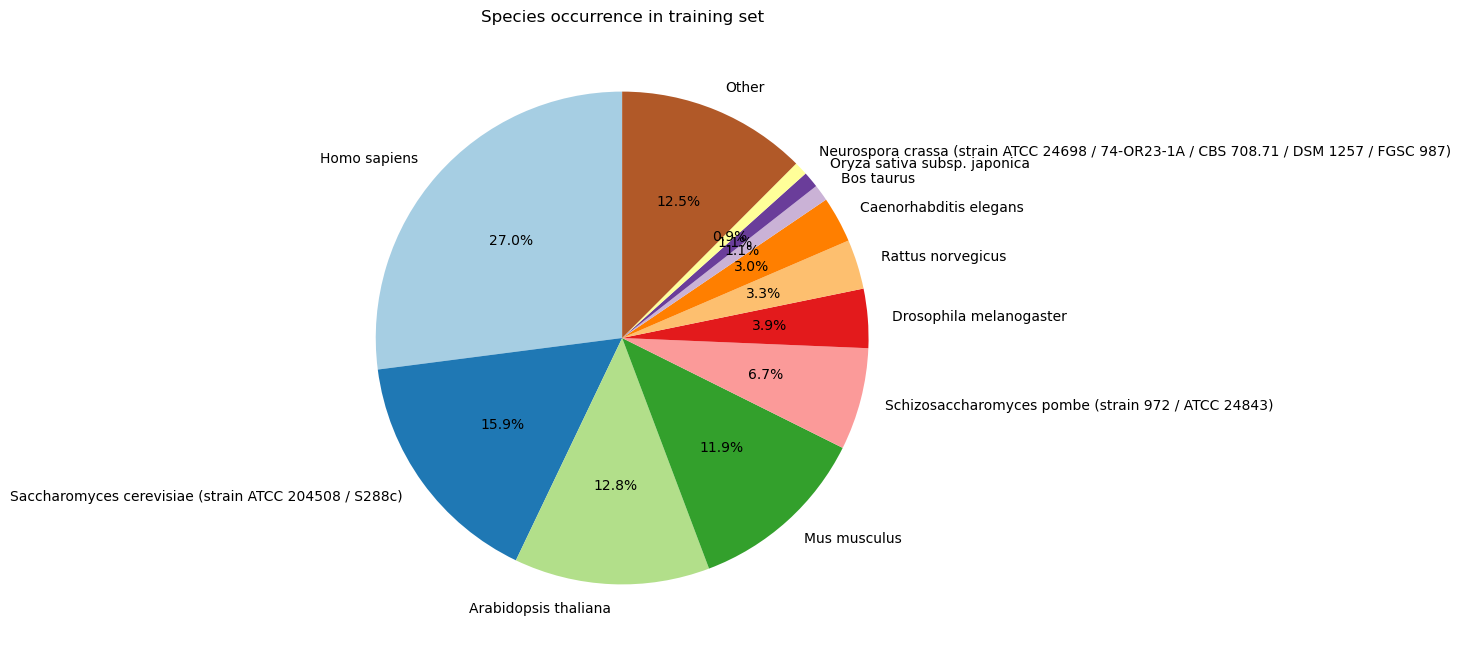

In [175]:
df_training =pd.read_csv('training_file_all_seq.tsv', sep='\t')

df_training_organism=df_training["Organism"].tolist()
total_entries_training=len(df_training_organism)
organism_training=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_training_organism:
        organism_training[element]+=1


species_training_pie = pd.DataFrame(organism_training.items(), columns=["Organism", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
species_training_pie = species_training_pie.sort_values(by='Occurrence', ascending=False)
threshold = 55 # You can adjust this value

small_values = species_training_pie[species_training_pie['Occurrence'] < threshold]
main_values = species_training_pie[species_training_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Organism': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Organism'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Species occurrence in training set')
plt.savefig("Species_occurrence_in_training_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()


## Taxonomic Distribution (Benchmark Set)

We perform the same taxonomic analysis for the **benchmark dataset** at the **Kingdom level**.

**Steps:**  
1. Count occurrences of each kingdom in the benchmark data.  
2. Sort kingdoms by abundance.  
3. Group less represented kingdoms (occurrences below a threshold, e.g., < 300) into a single category *"Other"*.  
4. Visualize the results in a pie chart, showing the percentage distribution of kingdoms in the benchmark dataset.  

**Goal:**  
- Summarize the taxonomic diversity of the benchmark set.  
- Highlight the dominant kingdoms while grouping rare ones to keep the visualization clear.  

The resulting chart (`Kingdom_occurrence_in_benchmark_set_pie.png`) provides a direct counterpart to the training set chart, enabling comparison between the two datasets.  

defaultdict(<class 'int'>, {'Viridiplantae': 331, 'Fungi': 526, 'Metazoa': 1117, 'Amoebozoa': 11, 'Sar': 14, 'Discoba': 5, 'Rhodophyta': 1, 'Haptista': 1})


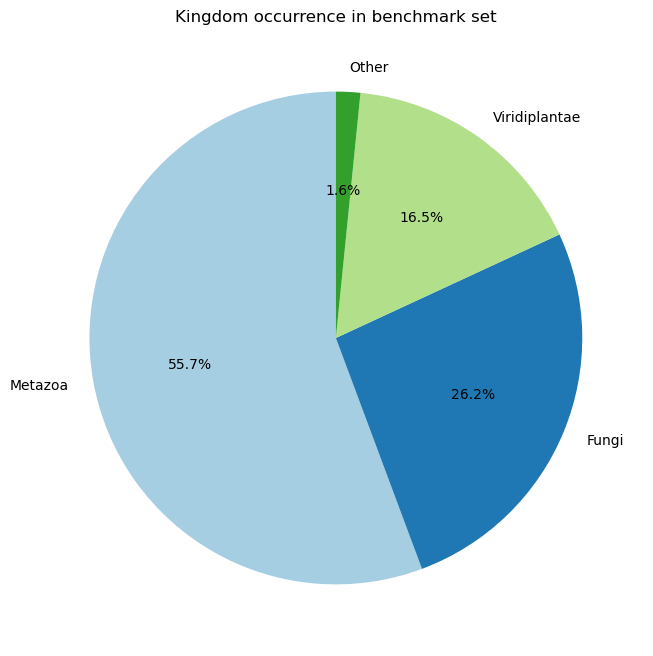

In [176]:
df_benchamrk =pd.read_csv('benchmark_arricchito.tsv', sep='\t')

df_benchmark_kingdom=df_benchamrk["Kingdom"].tolist()
total_entries_benchmark=len(df_benchmark_kingdom)
kingdoms_benchmark=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_benchmark_kingdom:
        kingdoms_benchmark[element]+=1
print(kingdoms_benchmark)
benchmark_pie = pd.DataFrame(kingdoms_benchmark.items(), columns=["Kingdom", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
benchmark_pie = benchmark_pie.sort_values(by='Occurrence', ascending=False)
threshold = 300 # You can adjust this value

small_values = benchmark_pie[benchmark_pie['Occurrence'] < threshold]
main_values = benchmark_pie[benchmark_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Kingdom': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Kingdom'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Kingdom occurrence in benchmark set')
plt.savefig("Kingdom_occurrence_in_benchmark_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()

## Taxonomic Distribution at Species Level (Benchmark Set)

We extend the taxonomic analysis of the benchmark dataset down to the **species level**.

**Steps:**  
1. Count occurrences of each species (organism) in the benchmark set.  
2. Sort species by abundance.  
3. Group less represented species (occurrences below a threshold, e.g., < 20) into a single category *"Other"*.  
4. Visualize the results in a pie chart, showing the relative contribution of the most common species and the aggregated "Other".  

**Goal:**  
- Provide a clear overview of species diversity in the benchmark set.  
- Avoid clutter by grouping rare species, while keeping the focus on dominant taxa.  

The resulting chart (`Species_occurrence_in_benchmark_set_pie.png`) complements the training set analysis and enables comparison of species composition across datasets.  

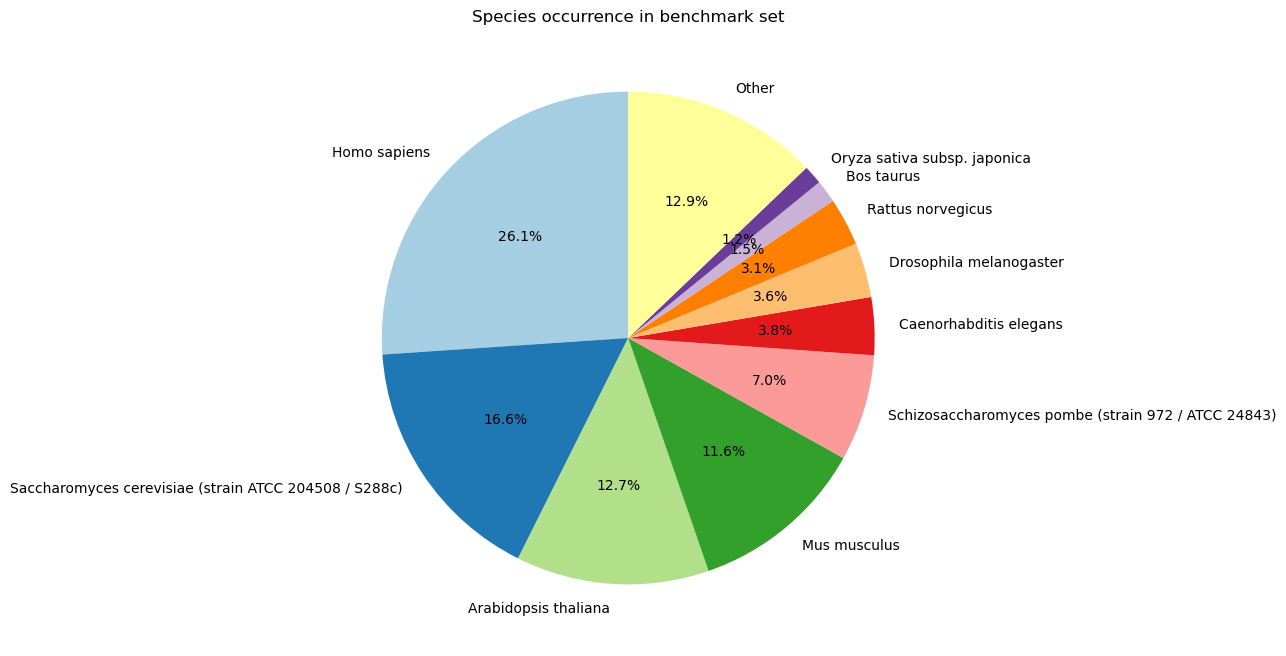

In [177]:
df_benchmark =pd.read_csv('benchmark_arricchito.tsv', sep='\t')


df_benchmark_organism=df_benchamrk["Organism"].tolist()
total_entries_benchmark=len(df_benchmark_organism)
organism_benchmark=defaultdict(int) #inizializza dizionario vuoto con valori uguali a zero, che poi sarà aggiornato durante il for loop

for element in df_benchmark_organism:
        organism_benchmark[element]+=1

species_benchmark_pie = pd.DataFrame(organism_benchmark.items(), columns=["Organism", "Occurrence"])

# Grouping the lesser represented taxa as "Other"
species_benchmark_pie = species_benchmark_pie.sort_values(by='Occurrence', ascending=False)
threshold =  20 # You can adjust this value

small_values = species_benchmark_pie[species_benchmark_pie['Occurrence'] < threshold]
main_values = species_benchmark_pie[species_benchmark_pie['Occurrence'] >= threshold]

# Create a new row for "Other"
other_occurrence = small_values['Occurrence'].sum()
other_row = pd.DataFrame([{'Organism': 'Other', 'Occurrence': other_occurrence}])

# Combine the data
cleaned_pie_data = pd.concat([main_values, other_row])

# Create the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(cleaned_pie_data['Occurrence'], labels=cleaned_pie_data['Organism'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Species occurrence in benchmark set')
plt.savefig("Species_occurrence_in_benchmark_set_pie.png",dpi=300, bbox_inches="tight")
plt.show()


## Sequence Logos of SP Cleavage Sites (Benchmark)

We focus on the **cleavage site motifs** of signal peptides in the benchmark dataset.

**Steps:**
1. Filter the benchmark dataset to keep only **positive sequences** (with signal peptides).  
2. For each sequence, extract a window around the cleavage site:  
   - From **13 residues upstream (-13)**  
   - To **2 residues downstream (+2)**.  
3. Build a frequency matrix of amino acids in this window using the `logomaker` library.  
4. Generate a **sequence logo** with a hydrophobicity-based color scheme.

**Goal:**  
Visualize conserved motifs around the SP cleavage site, highlighting enriched or depleted amino acids at specific positions.  
This provides insight into the sequence patterns characteristic of signal peptide cleavage.  

The final logo is saved as `sequence_logo_benchmark.png`.  


In [ ]:
bench_df=pd.read_csv("benchmark_arricchito.tsv",sep="\t")
bench_df['positive/negative'] =np.where(bench_df['SP cleavage']=='False', '-','+')
bench_df["subset_number"]="benchmark"

benchmark=[] #empty list which will hold all the signal peptide sequences

bench_df = bench_df.query("`positive/negative` == '+'") #the query() method takes a query expression as a string parameter, which has to evaluate to either True of False.
for index,row in bench_df.iterrows(): #metodo di Pandas per iterare 
    sequence=row["Sequence"]
    cleavage=int(row["SP cleavage"])
    benchmark.append(sequence[cleavage-13:cleavage+2]) #appending to the list only the signal peptide portion of the sequences

matrix_bench = lm.alignment_to_matrix(sequences=benchmark, to_type='information',characters_to_ignore='.-X')

 

lm.Logo(matrix_bench,color_scheme="hydrophobicity")
plt.savefig("sequence_logo_benchmark.png", dpi=300, bbox_inches="tight")
plt.show()


*lm.alignment_to_matrix(...): This is a function from the logomaker library (aliased here as lm). Its purpose is to convert a list of aligned sequences into a pandas DataFrame (a matrix). Each row of this matrix will represent a position in the sequence, 
and each column will represent a character ( 20 amino acids for proteins).
-sequences=benchmark: This is the input data. benchmark is expected to be a list of strings, where each string is a biological sequence (like DNA or protein) and all strings have the same length. This is what's meant by "aligned sequences." 
-to_type='information': This is the most critical parameter. It specifies the type of data you want in the output matrix. The 'information' type calculates the information content at each position of the alignment. Information content (measured in bits) is a quantitative measure of how conserved a position is. A high information content at a position means that the characters there are highly non-random and specific, while a low information content means the characters are more or less random. This is the standard data type for creating a classic sequence logo.
-characters_to_ignore='.-X': This tells logomaker to ignore certain characters when it's counting and calculating. In biological sequence alignments, the characters . (dots) and - (dashes) are often used to represent gaps in the alignment. The character X can represent an unknown or ambiguous character. By specifying these in characters_to_ignore, you ensure they don't contribute to the counts and calculations, which is crucial for getting an accurate representation of the sequence's information.*

## Sequence Logos of SP Cleavage Sites (Training Set)

We analyze the cleavage site motifs for the **training dataset**.

**Process:**
1. Keep only the **positive sequences** containing a signal peptide.  
2. For each sequence, extract a window around the cleavage site:  
   - From **-13 residues upstream**  
   - To **+2 residues downstream**.  
3. Convert these sequence windows into an alignment matrix using the `logomaker` library.  
4. Generate a **sequence logo** with a hydrophobicity-based color scheme.  

**Goal:**  
Visualize conserved amino acid patterns around the cleavage site, highlighting residues that are enriched or depleted in specific positions.  
This reveals structural motifs typical of signal peptide cleavage.  

The resulting logo is saved as `sequence_logo_training.png`.  


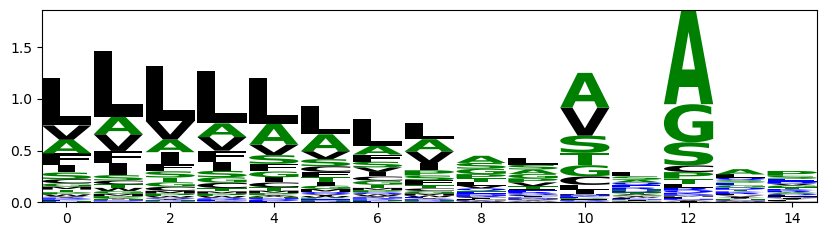

In [ ]:
train_df=pd.read_csv("training_file_all_seq.tsv",sep="\t")
train_df['positive/negative'] =np.where(train_df['SP cleavage']=='False', '-','+')

training=[]

train_df = train_df.query("`positive/negative` == '+'")
for index,row in train_df.iterrows():
    sequence=row["Sequence"]
    cleavage=int(row["SP cleavage"])
    training.append(sequence[cleavage-13:cleavage+2])

matrix_train = lm.alignment_to_matrix(sequences=training, to_type='information',characters_to_ignore='.-X')

 

lm.Logo(matrix_train,color_scheme="hydrophobicity")
plt.savefig("sequence_logo_training.png", dpi=300, bbox_inches="tight")
plt.show()
